In [1]:
# Author: Alexander Maksiaev
# Purpose: Analyze results from sentiment analysis -- this time from SentiWords module

In [2]:
# Housekeeping: Importing libraries, switching directories, etc.

import os
import pandas as pd
import csv 
import numpy as np
from statistics import mean
import re
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import f_oneway
import docx
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as mc

os.getcwd()

results_dir = r"C:\Users\maksi\Documents\UVA\Research\DMP\GitHub_DMP\Results"

results = os.listdir(results_dir)

os.chdir(results_dir)
sns.set_palette("viridis")

In [3]:
# Getting the data frame

results_clean = []
df = pd.read_csv("sentiments_sentiwords_3_15_2024_transgender.csv", low_memory=False)
print(df)
df = df.sort_values("Textbook")

print(df)

                              Textbook     Score
0    Abn_Barlow_04_Transgender_v2.docx -0.022799
1    Abn_Barlow_05_Transgender_v2.docx -0.025626
2    Abn_Barlow_06_Transgender_v2.docx  0.006369
3    Abn_Barlow_07_Transgender_v2.docx -0.062992
4       Abn_Barlow_08_Transgender.docx -0.009465
..                                 ...       ...
233  Spcl_Turnbull_05_Transgender.docx  0.064103
234  Spcl_Turnbull_06_Transgender.docx  0.002165
235  Spcl_Turnbull_07_Transgender.docx -0.032895
236  Spcl_Turnbull_08_Transgender.docx  0.084433
237    Spcl_Vaughn_07_Transgender.docx  0.085903

[238 rows x 2 columns]
                              Textbook     Score
0    Abn_Barlow_04_Transgender_v2.docx -0.022799
1    Abn_Barlow_05_Transgender_v2.docx -0.025626
2    Abn_Barlow_06_Transgender_v2.docx  0.006369
3    Abn_Barlow_07_Transgender_v2.docx -0.062992
4       Abn_Barlow_08_Transgender.docx -0.009465
..                                 ...       ...
233  Spcl_Turnbull_05_Transgender.docx  0.064

,Mean,Standard Deviation
Field,,
Abn,-0.049356,0.036306
Devo,0.068915,0.031883
GS,0.024352,0.025680
HS,0.052986,0.019895
Intro,0.054217,0.040978
Neuro,0.023081,0.063885
Socl,0.053028,0.030340
Spcl,0.025191,0.062939


F_onewayResult(statistic=30.862002638688693, pvalue=6.177359766528637e-30)


group1,group2,meandiff,p-adj,lower,upper,reject
Abn,Devo,0.1183,0.0,0.0903,0.1462,True
Abn,GS,0.0737,0.0,0.0426,0.1048,True
Abn,HS,0.1023,0.0,0.0688,0.1359,True
Abn,Intro,0.1036,0.0,0.0759,0.1312,True
Abn,Neuro,0.0724,0.0,0.0398,0.105,True
Abn,Socl,0.1024,0.0,0.071,0.1338,True
Abn,Spcl,0.0745,0.0,0.041,0.1081,True
Devo,GS,-0.0446,0.0004,-0.0753,-0.0138,True
Devo,HS,-0.0159,0.8251,-0.0492,0.0173,False
Devo,Intro,-0.0147,0.7198,-0.042,0.0126,False


                              Textbook     Score    Author Field
0    Abn_Barlow_04_Transgender_v2.docx -0.022799    Barlow   Abn
1    Abn_Barlow_05_Transgender_v2.docx -0.025626    Barlow   Abn
2    Abn_Barlow_06_Transgender_v2.docx  0.006369    Barlow   Abn
3    Abn_Barlow_07_Transgender_v2.docx -0.062992    Barlow   Abn
4       Abn_Barlow_08_Transgender.docx -0.009465    Barlow   Abn
..                                 ...       ...       ...   ...
233  Spcl_Turnbull_05_Transgender.docx  0.064103  Turnbull  Spcl
234  Spcl_Turnbull_06_Transgender.docx  0.002165  Turnbull  Spcl
235  Spcl_Turnbull_07_Transgender.docx -0.032895  Turnbull  Spcl
236  Spcl_Turnbull_08_Transgender.docx  0.084433  Turnbull  Spcl
237    Spcl_Vaughn_07_Transgender.docx  0.085903    Vaughn  Spcl

[238 rows x 4 columns]


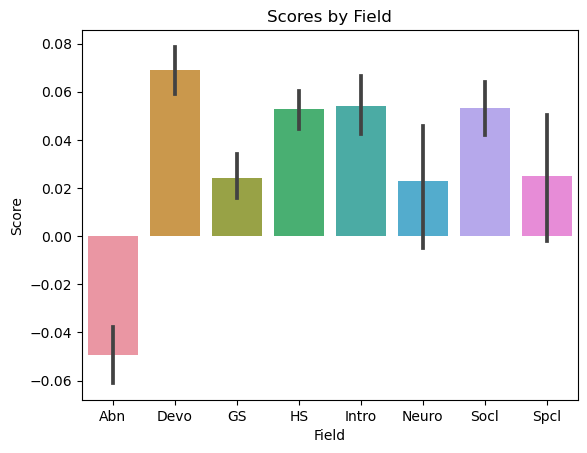

In [4]:
# Field Analysis

# Break up the data frame into fields

field_df = df

fields = ["Abn", "Devo", "GS", "HS", "Intro", "Neuro", "Socl", "Spcl"]

all_fields = []

fields_regex = ["Abn.*", "Devo.*", "Intro.*", "Neuro.*", "Socl.*", "Spcl.*", "GS.*", "HS.*"]

authors = ["Barlow", "Brown", "Comer", "Hooley", "Kearney", "Mash", "Nevid", "Nolen-Hoeksema", "Sue", 
                 "Whitbourne", "Berger", "Berk", "Bornstein", "Feldman", "Kail", "Miller", "Devo_Newman", "Santrock", 
                 "Sigelman", "Bernstein", "Coon", "Griggs", "Intro_Kalat", "Morris", "Intro_Myers", "Rathus", "Wade", "Weiten", 
                 "Bear", "Breedlove", "Carlson", "Garrett", "Johnson", "Neuro_Kalat", "Kolb", "Pinel", "Reisberg", "Aronson", 
                 "Baumeister", "Branscombe", "Gilovich", "Gruman", "Socl_Myers", "Rogers", "Zastrow", "Friend", "Gargiulo", "Hardman", 
                 "Heward", "Kuder", "Lewis", "Overton", "Smith", "Turnbull", "Vaughn", 
                 "GS_Newman", "Rothenberg", "Wood", "Carroll", "Crooks", "Hyde", "LeVay", 
                 "Gonzalez-Mena", "Haines", "Franzoi", "Kassin", "Andersen", "Brannon", "Healey", "Helgeson", "Kimmel", "Robinson", 
                 "Greenberg", "Hock", "Yarber"]



for field in fields_regex:
    field_l = field_df[field_df["Textbook"].str.contains(field, regex=True)]
    all_fields.append(field_l)
    

# Find average score per field

field_means = []
field_names = []
author_names = []
                
for textbook in range(len(field_df)):
    if len(field_df[field_df["Textbook"].str.contains("^.+_", regex=True)]) > 0:
        chunk = field_df["Textbook"].iloc[textbook]
        field = chunk.split("_")[0]
        author = chunk.split("_")[1]
        field_names.append(field)
        author_names.append(author)
    
field_df["Author"] = author_names
field_df["Field"] = field_names

# mean = field_df.groupby('Field')['Score'].mean()
# std = field_df.groupby('Field')['Score'].std()

# Find means

field_intermediary_df = field_df[["Score", "Field"]]
field_means_df = field_intermediary_df.groupby(["Field"]).mean()
field_means_df = field_means_df.rename(columns={"Score":"Mean"})
field_stdev_df = field_intermediary_df.groupby(["Field"]).std()
field_stdev_df = field_stdev_df.rename(columns={"Score":"Standard Deviation"})


field_stats_df = pd.concat([field_means_df, field_stdev_df], axis="columns")

display(field_stats_df)

# Do ANOVA

# print(field_df[field_df['Field'] == 'Devo']["Score"])

anova = f_oneway(field_df[field_df['Field'] == 'Abn']["Score"], field_df[field_df['Field'] == 'Devo']['Score'],
        field_df[field_df['Field'] == 'GS']['Score'], field_df[field_df['Field'] == 'HS']['Score'],
        field_df[field_df['Field'] == 'Intro']['Score'], field_df[field_df['Field'] == 'Neuro']['Score'], 
        field_df[field_df['Field'] == 'Socl']['Score'], field_df[field_df['Field'] == 'Spcl']['Score'])

print(anova)

# Post-hoc testing

comp = mc.MultiComparison(df['Score'], df['Field'])
post_hoc_res = comp.tukeyhsd()
display(post_hoc_res.summary())


fig, ax = plt.subplots()

print(field_df)

sns.barplot(ax = ax,
    data=field_df, x="Field", y="Score"
)
# ax.bar_label(ax.containers[0], fontsize=10);

# ax.errorbar(mean.index, mean)
ax.set_title("Scores by Field")

plt.savefig('fields_transgender_sentiwords.png')

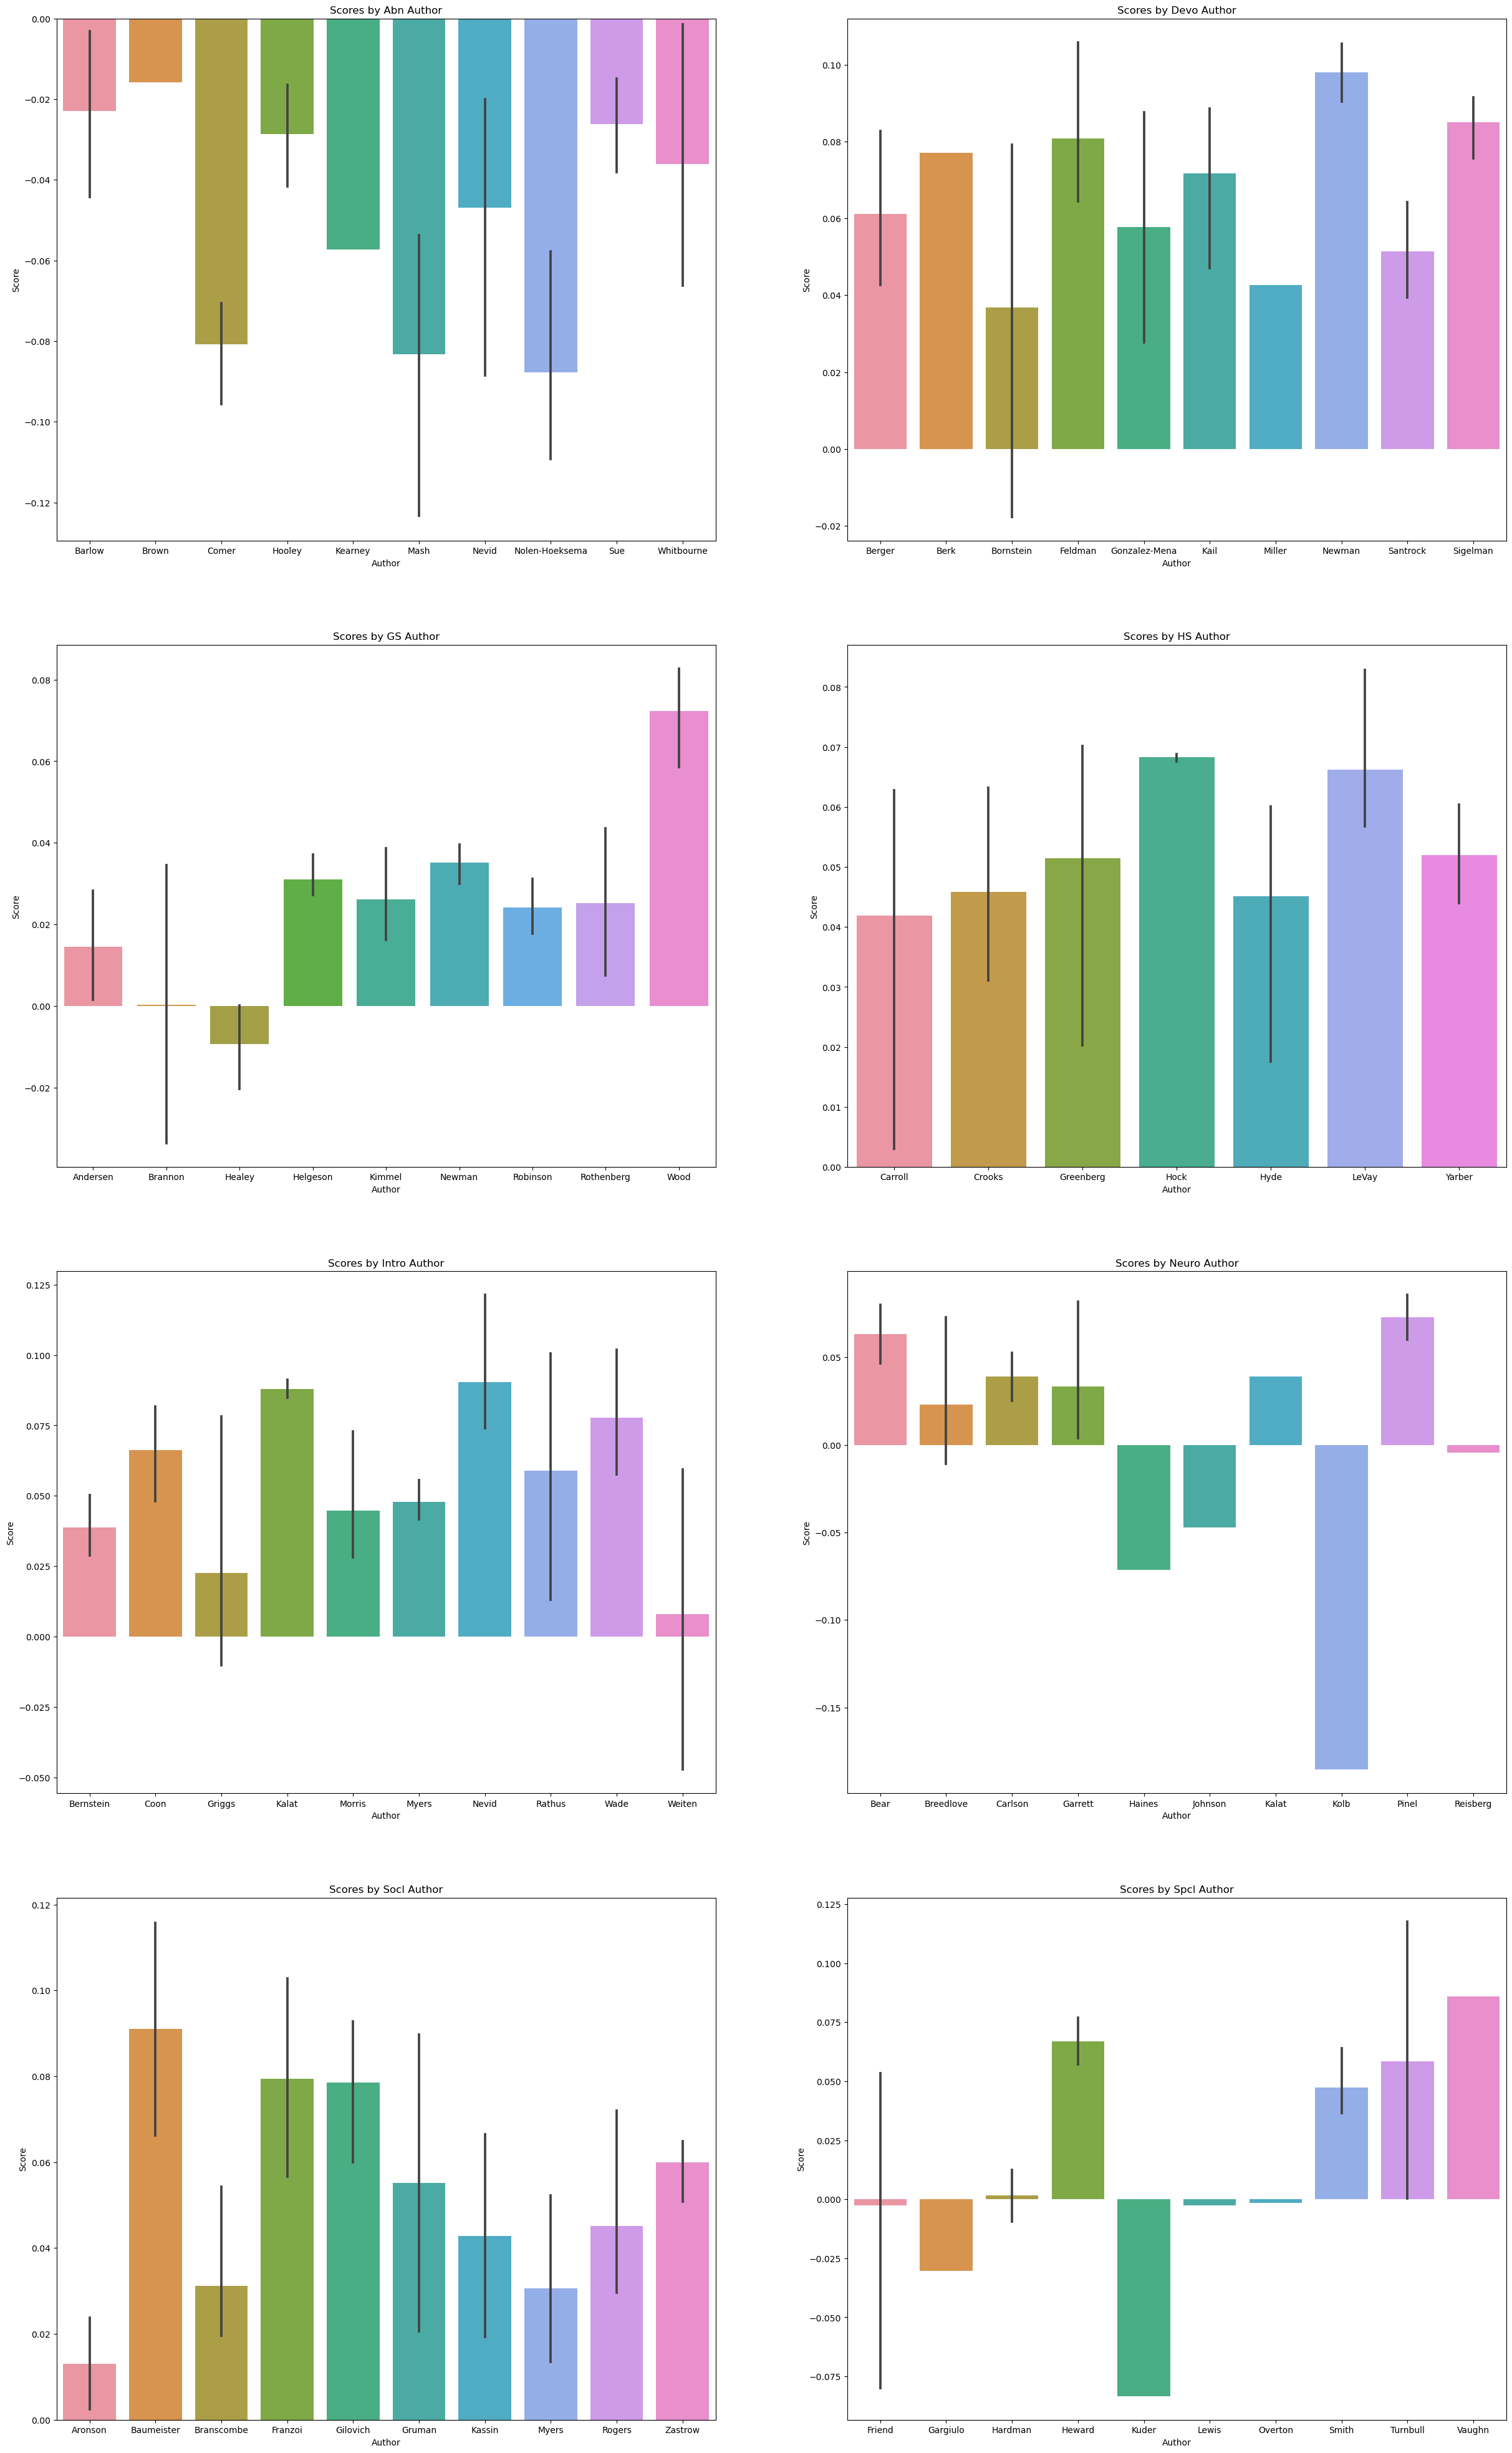

In [5]:
# Author Analysis

# Break up dataframe into authors

author_df = field_df

all_authors = []

for author in authors:
    author_l = author_df[author_df["Textbook"].str.contains(author)]
    all_authors.append(author_l)

author_means_df = author_df

fig, ax = plt.subplots(4, 2, figsize = (30,50))

sns.barplot(ax = ax[0][0],
    data=author_means_df.loc[author_means_df['Field']=='Abn'], x="Author", y="Score"
)
sns.barplot(ax = ax[0][1],
    data=author_means_df.loc[author_means_df['Field']=='Devo'], x="Author", y="Score"
)
sns.barplot(ax = ax[1][0],
    data=author_means_df.loc[author_means_df['Field']=='GS'], x="Author", y="Score"
)
sns.barplot(ax = ax[1][1],
    data=author_means_df.loc[author_means_df['Field']=='HS'], x="Author", y="Score"
)
sns.barplot(ax = ax[2][0],
    data=author_means_df.loc[author_means_df['Field']=='Intro'], x="Author", y="Score"
)
sns.barplot(ax = ax[2][1],
    data=author_means_df.loc[author_means_df['Field']=='Neuro'], x="Author", y="Score"
)
sns.barplot(ax = ax[3][0],
    data=author_means_df.loc[author_means_df['Field']=='Socl'], x="Author", y="Score"
)
sns.barplot(ax = ax[3][1],
    data=author_means_df.loc[author_means_df['Field']=='Spcl'], x="Author", y="Score"
)

ax[0][0].set_title("Scores by Abn Author")
ax[0][1].set_title("Scores by Devo Author")
ax[1][0].set_title("Scores by GS Author")
ax[1][1].set_title("Scores by HS Author")

ax[2][0].set_title("Scores by Intro Author")
ax[2][1].set_title("Scores by Neuro Author")
ax[3][0].set_title("Scores by Socl Author")
ax[3][1].set_title("Scores by Spcl Author")

# for f in fields:
for counter in range(4):
    for subcounter in range(2):
        extent = ax[counter][subcounter].get_window_extent().transformed(fig.dpi_scale_trans.inverted())
        title = "authors_transgender_" + str(counter) + "_" + str(subcounter) + "_sentiwords.png"
#         ax[counter][subcounter].figure.savefig(title, bbox_inches=extent.expanded(1.2, 1.20))
    counter += 1


In [6]:
# # Edition Analysis

# edition_df = df

# # Cut up dataframe into chunks by author

# all_editions = []
# author_total = []
# test = []
# slope = []
# for a_df in all_authors:
#     author_name = ""
#     alphabetical = a_df["Textbook"].str.split("_").values 
#     editions = [] # Get only the edition
#     for l in alphabetical:
#         editions.append(l[2])
#         all_editions.append(l[2])
#         author_name = l[0] + "_" + l[1]
#         author_total.append(author_name)
#     test.append(editions)
#     a_df.loc[:,"Edition"] = editions
#     a_df.loc[:,"Edition"] = pd.to_numeric(a_df["Edition"])
#     a_df = a_df.sort_values("Edition")
#     if len(a_df["Edition"]) > 0:
#         res = stats.linregress(a_df["Edition"].astype(float), a_df["Score"])
#         for l in alphabetical:
#             if len(alphabetical) > 1:
#                 slope.append(res.slope)
#             else:
#                 slope.append(0)

# edition_df["Edition"] = all_editions
# edition_df["Author"] = author_total
# edition_df["Slope"] = slope
# print(edition_df)

# fig, axes = plt.subplots(1, 2, figsize=(18, 5))

# # Break up plot into plot where slopes are negative (<-0.055) and plot where slopes are positive (>0.055)

# high = edition_df[edition_df["Slope"] > 0.055]
# high = high.sort_values("Edition")
# sns.lineplot(ax = axes[0], x="Edition", y="Score", hue="Author", data=high, sort=False)

# low = edition_df[edition_df["Slope"] <= -0.055]
# h = sns.lineplot(ax = axes[1], x="Edition", y="Score", hue="Author", data=low)

# plt.show()


C:\Users\maksi\AppData\Local\Temp\ipykernel_17384\172732561.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a_df.loc[:,"Edition"] = editions
C:\Users\maksi\AppData\Local\Temp\ipykernel_17384\172732561.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a_df.loc[:,"Edition"] = editions
C:\Users\maksi\anaconda3\Lib\site-packages\scipy\stats\_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
C:\Users\maksi\anaconda3\Lib\site-packages\scipy\stats

[]


C:\Users\maksi\AppData\Local\Temp\ipykernel_17384\172732561.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a_df.loc[:,"Edition"] = editions
C:\Users\maksi\anaconda3\Lib\site-packages\scipy\stats\_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
C:\Users\maksi\anaconda3\Lib\site-packages\scipy\stats\_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
C:\Users\maksi\anaconda3\Lib\site-packages\scipy\stats\_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in scalar divide
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)
C:\Users\maksi\AppData\Local\Temp\ipykernel_17384\1

<Axes: >

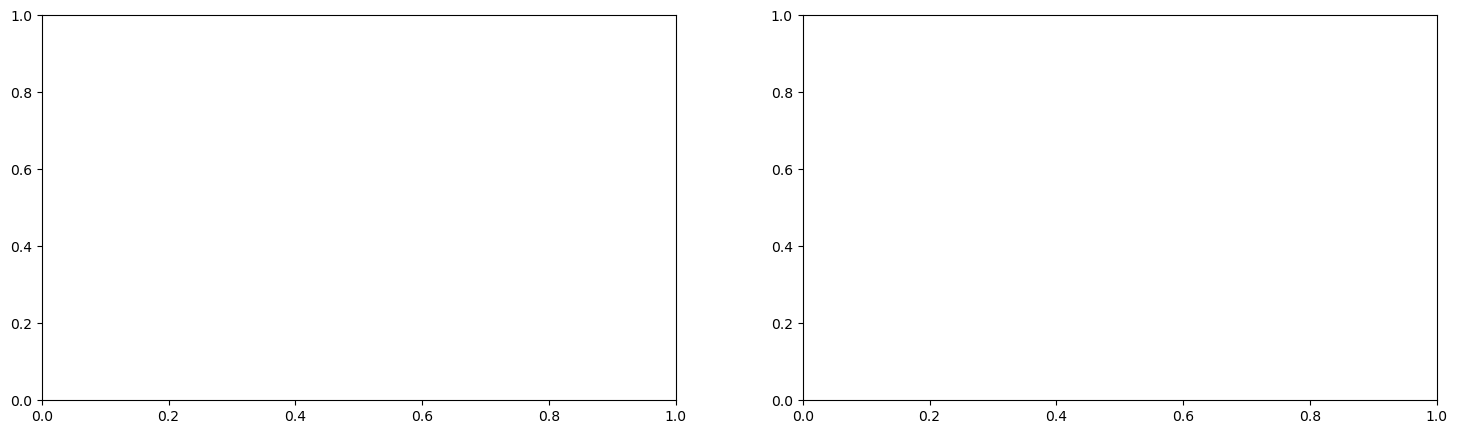

In [7]:
# Edition Analysis

edition_df = df


# Cut up dataframe into chunks by author

all_editions = []
author_total = []
test = []
slope = []
for a_df in all_authors:
    author_name = ""
    alphabetical = a_df["Textbook"].str.split("_").values 
    editions = [] # Get only the edition
    for l in alphabetical:
        editions.append(l[2])
        all_editions.append(l[2])
        author_name = l[0] + "_" + l[1]
        author_total.append(author_name)
    test.append(editions)
    a_df.loc[:,"Edition"] = editions
    a_df.loc[:,"Edition"] = pd.to_numeric(a_df["Edition"])
    a_df = a_df.sort_values("Edition")
    if len(a_df["Edition"]) > 0:
        res = stats.linregress(a_df["Edition"].astype(float), a_df["Score"])
        for l in alphabetical:
            if len(alphabetical) > 1:
                slope.append(res.slope)
            else:
                slope.append(0)

edition_df["Edition"] = all_editions
edition_df["Author"] = author_total
edition_df["Slope"] = slope

# Find consistently positive/negative authors
author_dfs = []
authors = edition_df["Author"].unique()
for author in authors:
    single_author_df = edition_df[edition_df["Author"] == author]
    if single_author_df["Score"].mean() > 1 or single_author_df["Score"].mean() < -1: # if they're consistent, their means will be above or below also
        author_dfs.append(single_author_df)
        
print(author_dfs)

fig, axes = plt.subplots(1, 2, figsize=(18, 5))

# Break up plot into plot where slopes are negative (<-0.055) and plot where slopes are positive (>0.055)

high = edition_df[edition_df["Slope"] >= 1]
sns.lineplot(ax = axes[0], x="Edition", y="Score", hue="Author", data=high)

low = edition_df[edition_df["Slope"] <= -1]
sns.lineplot(ax = axes[1], x="Edition", y="Score", hue="Author", data=low)

# fig, axes = plt.subplots(1, 2, figsize=(18, 5))

# positive = 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     2.912
Date:                Sat, 30 Mar 2024   Prob (F-statistic):              0.103
Time:                        18:04:50   Log-Likelihood:                 48.424
No. Observations:                  22   AIC:                            -92.85
Df Residuals:                      20   BIC:                            -90.67
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.7865      1.648     -1.691      0.106      -6.223       0.650
Year           0.0014      0.001      1.707      0.103      -0.000       0.003
==============================================================================
Omnibus:                        2.797   Durbin-Watson:                   2.683
Prob(Omnibus):                  0.247   Jarque-Bera (JB):                1.191
Skew:                          -0.346   Prob(JB):                        0.551
Kurtosis:                       3.905   Cond. No.                     5.52e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

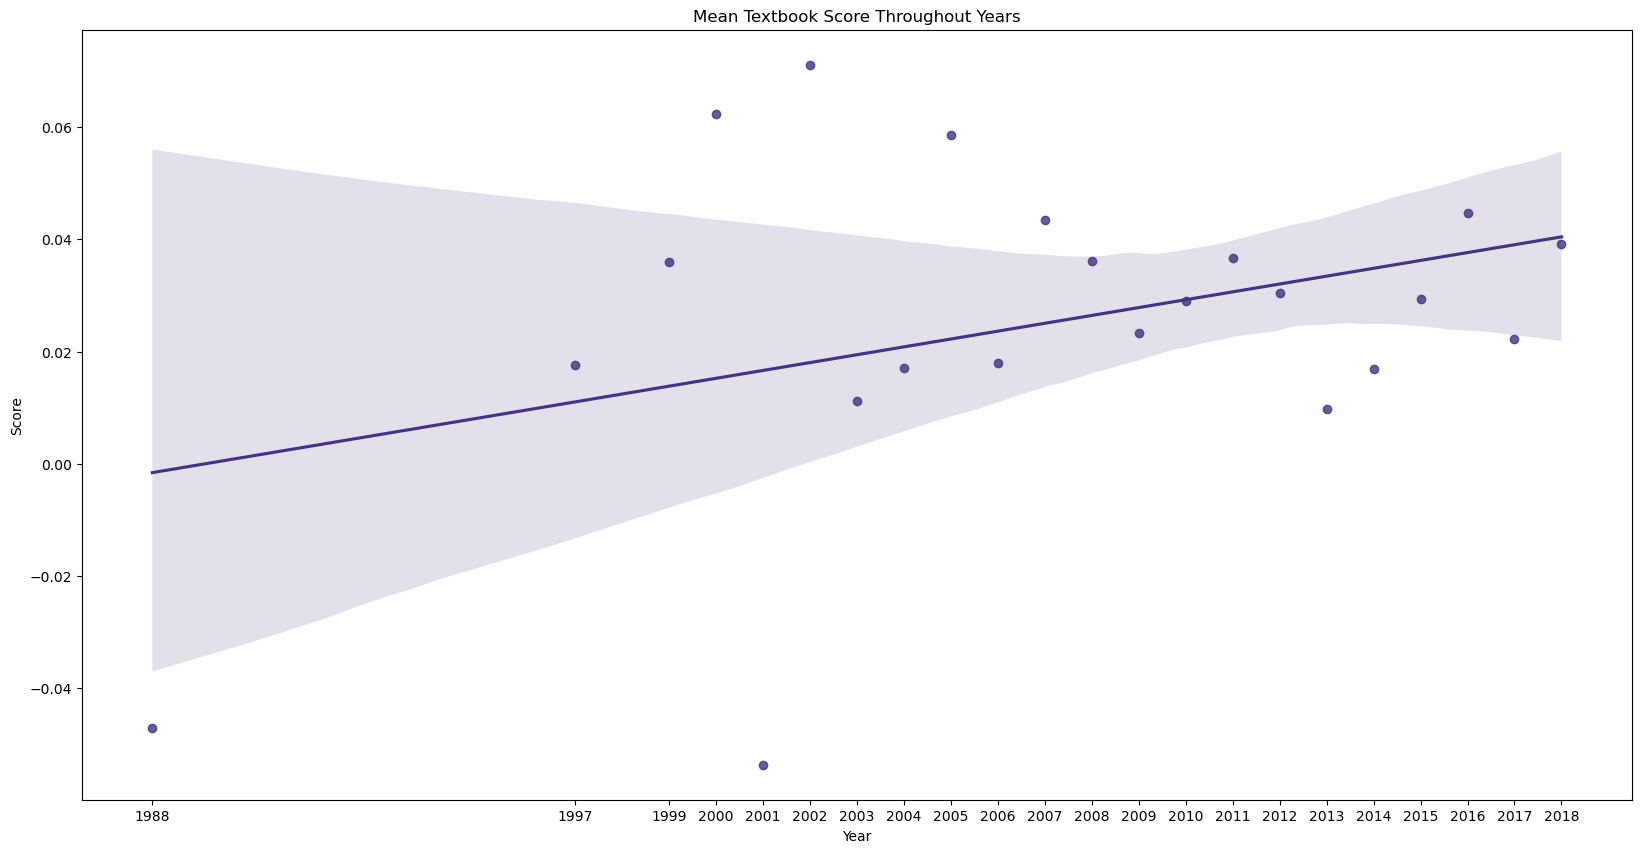

In [8]:
# Year Analysis

year_df = df

# There is a better way to get dates...

textbook_dir = r"C:\Users\maksi\Documents\UVA\Research\DMP\Textbook_Dump_Transgender"

textbooks = os.listdir(textbook_dir)

os.chdir(textbook_dir)

# Function to get full text
def getText(filename):
    doc = docx.Document(filename)
    fullText = []
    for para in doc.paragraphs:
        fullText.append(para.text)
    return fullText

# Dictionary filled with years for all the books
book_years = {}
for book in textbooks:
    total_text = getText(book)
    titles = total_text[1]
    no_parentheses = titles[1:len(titles)-1]
    if "," in no_parentheses:
        year = no_parentheses.split(",")[1]
        year = int(year)
        book_years[book] = year

# Overall mean for each year, for all textbooks

# Make new dictionary where year corresponds to a list of textbooks
year_textbooks = {}

# Get all the years
years = []
for book in book_years:
    year = book_years[book]
    if year not in years:
        years.append(year)
years.sort()

# Now, add each year as a key and a list of books as the value
for year in years:
    books = []
    for book in book_years:
        if book_years[book] == year:
            books.append(book)
    year_textbooks[year] = books
    

# Find mean of the books in each year

year_scores = {}
for year in year_textbooks:
    book_list = year_textbooks[year]
    scores = []
    for book in book_list:
        # Find the book in the df
        string_to_query = "Textbook=='" + book + "'"
        score = year_df.query(string_to_query)["Score"]
        scores.append(float(score.iloc[0]))
    average = mean(scores)
    year_scores[year] = [year, average]
    
# Graph it

graphing_years = pd.DataFrame.from_dict(year_scores, orient="index", columns=["Year", "Score"])
# graphing_years = graphing_years.reset_index()

# model = sm.OLS(graphing_years["Score"], graphing_years["Year"])
# results = model.fit()
# display(results.summary())

# print(results.summary())
# print(results.params)

res = smf.ols(formula='Score ~ Year', data=graphing_years).fit() # y ~ x
display(res.summary())

os.chdir(results_dir)

fig, ax = plt.subplots(figsize=(20, 10)) 

# sns.lineplot(ax = ax, x="Year", y="Score", data=graphing_years)
sns.regplot(ax = ax, x="Year", y="Score", data=graphing_years);

ax.set_xticks(graphing_years["Year"])
ax.set_title("Mean Textbook Score Throughout Years")
plt.savefig('years_transgender_sentiwords.png')

C:\Users\maksi\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                 -0.017
Method:                 Least Squares   F-statistic:                    0.7127
Date:                Sat, 30 Mar 2024   Prob (F-statistic):              0.411
Time:                        18:05:05   Log-Likelihood:                 43.529
No. Observations:                  18   AIC:                            -83.06
Df Residuals:                      16   BIC:                            -81.28
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7164      2.087      0.822      0.423      -2.708       6.141
Year          -0.0009      0.001     -0.844      0.411      -0.003       0.001
==============================================================================
Omnibus:                        9.972   Durbin-Watson:                   2.169
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                6.916
Skew:                           1.322   Prob(JB):                       0.0315
Kurtosis:                       4.494   Cond. No.                     7.78e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.78e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\maksi\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.320
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     7.048
Date:                Sat, 30 Mar 2024   Prob (F-statistic):             0.0180
Time:                        18:05:05   Log-Likelihood:                 36.582
No. Observations:                  17   AIC:                            -69.16
Df Residuals:                      15   BIC:                            -67.50
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.0111      1.911     -2.622      0.019      -9.085      -0.938
Year           0.0025      0.001      2.655      0.018       0.000       0.005
==============================================================================
Omnibus:                        1.666   Durbin-Watson:                   1.623
Prob(Omnibus):                  0.435   Jarque-Bera (JB):                0.366
Skew:                           0.247   Prob(JB):                        0.833
Kurtosis:                       3.523   Cond. No.                     5.28e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.28e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\maksi\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                 -0.134
Method:                 Least Squares   F-statistic:                   0.05436
Date:                Sat, 30 Mar 2024   Prob (F-statistic):              0.822
Time:                        18:05:05   Log-Likelihood:                 26.994
No. Observations:                   9   AIC:                            -49.99
Df Residuals:                       7   BIC:                            -49.59
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.7758      3.552     -0.218      0.833      -9.176       7.624
Year           0.0004      0.002      0.233      0.822      -0.004       0.005
==============================================================================
Omnibus:                        5.461   Durbin-Watson:                   1.328
Prob(Omnibus):                  0.065   Jarque-Bera (JB):                2.151
Skew:                          -1.189   Prob(JB):                        0.341
Kurtosis:                       3.281   Cond. No.                     1.57e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.57e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\maksi\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                 -0.027
Method:                 Least Squares   F-statistic:                    0.6341
Date:                Sat, 30 Mar 2024   Prob (F-statistic):              0.440
Time:                        18:05:06   Log-Likelihood:                 33.228
No. Observations:                  15   AIC:                            -62.46
Df Residuals:                      13   BIC:                            -61.04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.4156      3.094     -0.781      0.449      -9.100       4.269
Year           0.0012      0.002      0.796      0.440      -0.002       0.005
==============================================================================
Omnibus:                        1.978   Durbin-Watson:                   2.095
Prob(Omnibus):                  0.372   Jarque-Bera (JB):                0.724
Skew:                          -0.526   Prob(JB):                        0.696
Kurtosis:                       3.233   Cond. No.                     8.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\maksi\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     1.241
Date:                Sat, 30 Mar 2024   Prob (F-statistic):              0.294
Time:                        18:05:06   Log-Likelihood:                 19.316
No. Observations:                  11   AIC:                            -34.63
Df Residuals:                       9   BIC:                            -33.84
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.8178      6.989      1.119      0.292      -7.993      23.629
Year          -0.0039      0.003     -1.114      0.294      -0.012       0.004
==============================================================================
Omnibus:                        3.481   Durbin-Watson:                   3.024
Prob(Omnibus):                  0.175   Jarque-Bera (JB):                1.011
Skew:                          -0.669   Prob(JB):                        0.603
Kurtosis:                       3.645   Cond. No.                     1.01e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\maksi\anaconda3\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     13.16
Date:                Sat, 30 Mar 2024   Prob (F-statistic):             0.0222
Time:                        18:05:06   Log-Likelihood:                 19.991
No. Observations:                   6   AIC:                            -35.98
Df Residuals:                       4   BIC:                            -36.40
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.9310      2.720      3.651      0.022       2.378      17.484
Year          -0.0049      0.001     -3.628      0.022      -0.009      -0.001
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   3.250
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.123
Skew:                           0.228   Prob(JB):                        0.940
Kurtosis:                       2.466   Cond. No.                     1.27e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.27e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\maksi\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     1.050
Date:                Sat, 30 Mar 2024   Prob (F-statistic):              0.340
Time:                        18:05:06   Log-Likelihood:                 16.973
No. Observations:                   9   AIC:                            -29.95
Df Residuals:                       7   BIC:                            -29.55
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.6849      5.518      1.030      0.337      -7.363      18.732
Year          -0.0028      0.003     -1.025      0.340      -0.009       0.004
==============================================================================
Omnibus:                        2.644   Durbin-Watson:                   1.486
Prob(Omnibus):                  0.267   Jarque-Bera (JB):                0.757
Skew:                          -0.707   Prob(JB):                        0.685
Kurtosis:                       3.144   Cond. No.                     8.00e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  8e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

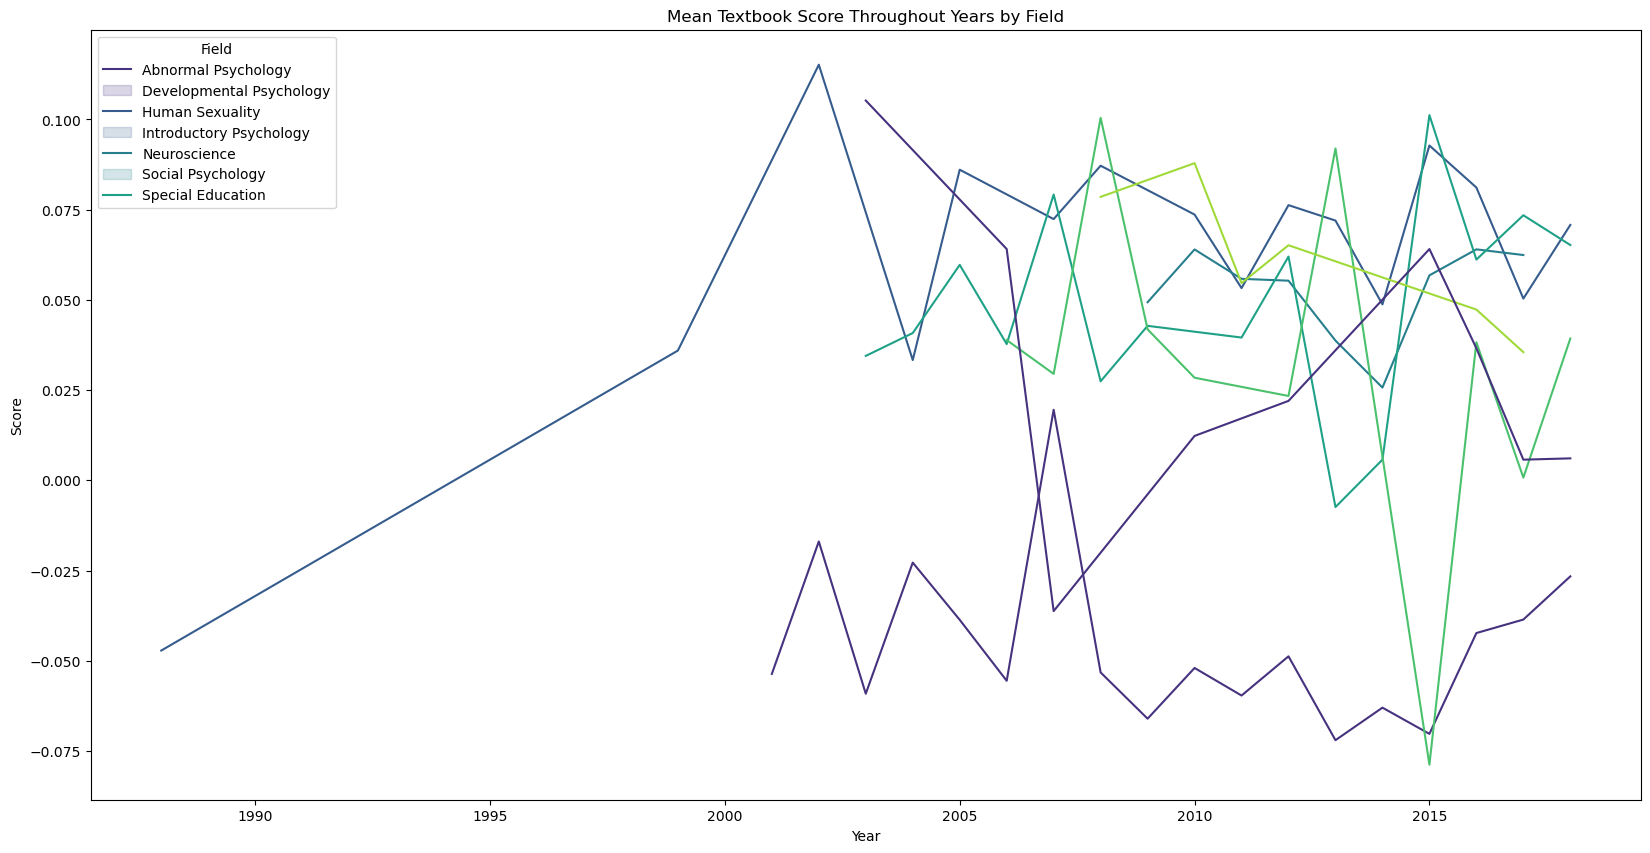

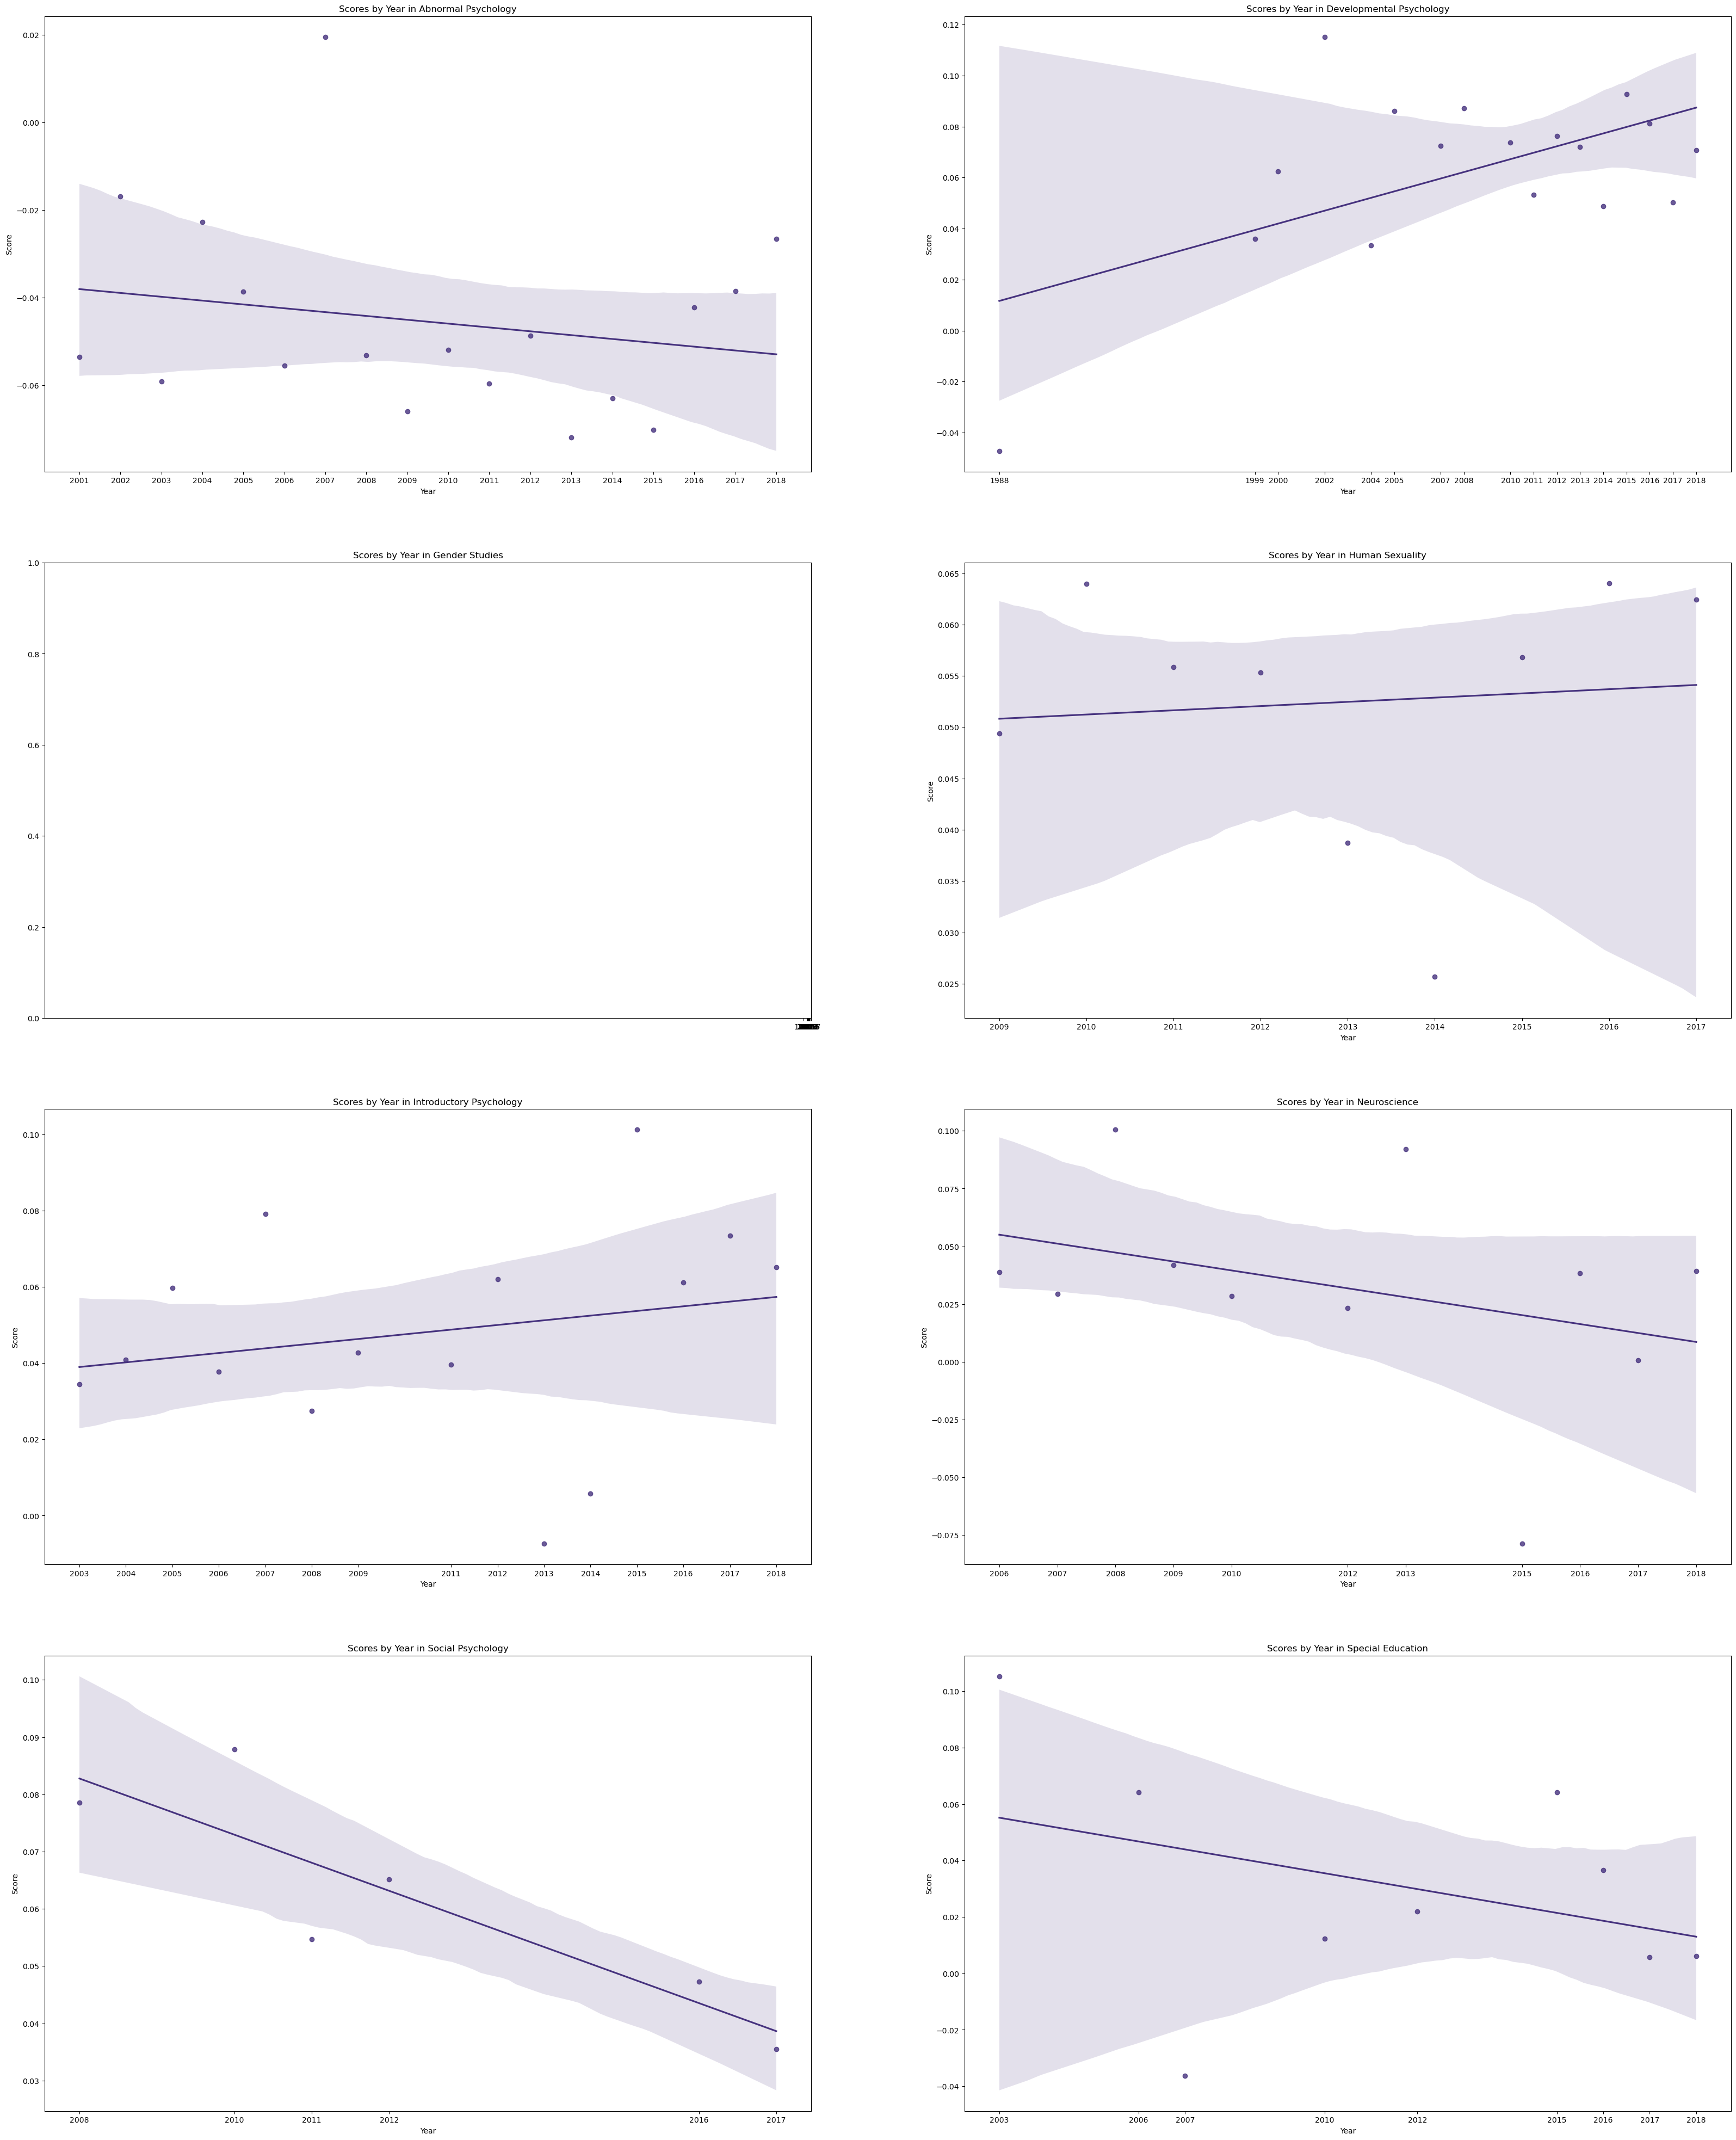

In [9]:
# Years by field

# Year Analysis

year_df = df

# Get a field from the big data frame
def getFieldDF(df, field):
    df1 = df[df['Field'] == field]
    return df1

# Get all the fields
fields = df.Field.unique()

# Make a list where each element is a dataframe with only one field
field_dfs = []
for f in fields:
    f_df = getFieldDF(year_df, f)
    field_dfs.append(f_df)


# print(field_dfs)

# There is a better way to get dates...

textbook_dir = r"C:\Users\maksi\Documents\UVA\Research\DMP\Textbook_Dump_Transgender"

textbooks = os.listdir(textbook_dir)

os.chdir(textbook_dir)

# Function to get full text
def getText(filename):
    doc = docx.Document(filename)
    fullText = []
    for para in doc.paragraphs:
        fullText.append(para.text)
    return fullText

# Dictionary filled with years for all the books
book_years = {}
for book in textbooks:
    total_text = getText(book)
    titles = total_text[1]
    no_parentheses = titles[1:len(titles)-1]
    if "," in no_parentheses:
        year = no_parentheses.split(",")[1]
        year = int(year)
        book_years[book] = year
        
# Make new dictionary where year corresponds to a list of textbooks
year_textbooks = {}

# Get all the years
years = []
for book in book_years:
    year = book_years[book]
    if year not in years:
        years.append(year)
years.sort()

# Now, add each year as a key and a list of books as the value
for year in years:
    books = []
    for book in book_years:
        if book_years[book] == year:
            books.append(book)
    year_textbooks[year] = books

def getYear(book_df):

    # Overall mean for each year, for all textbooks in a field

    # Find mean of the books in each year
    year_scores = {}
    for year in year_textbooks:
        book_list = year_textbooks[year]
        scores = []
        for book in book_list:
            # Find the book in the df
            string_to_query = "Textbook=='" + book + "'"
            score = book_df.query(string_to_query)["Score"]
            # If the score exists (that is, if the book is in this dataframe)
            if len(score) > 0:
                scores.append(float(score.iloc[0]))
        if len(scores) > 0:
            average = mean(scores)
            year_scores[year] = [year, average]
    
    return year_scores

# Get the years for each field dataframe
year_scores = []
for f_df in field_dfs:
#     print(f_df)
    year_score = getYear(f_df)
#     print(year_score)
    graphing_years = pd.DataFrame.from_dict(year_score, orient="index", columns=["Year", "Score"])
    graphing_years["Field"] = f_df["Field"].iloc[0] # Include the field
    graphing_years = graphing_years.reset_index()
    year_scores.append(graphing_years)

# Graph it




# print(year_scores)

os.chdir(results_dir)

fig, ax = plt.subplots(figsize=(20, 10)) 

sns.lineplot(ax = ax, x="Year", y="Score", data=year_scores[0])
sns.lineplot(ax = ax, x="Year", y="Score", data=year_scores[1])
# sns.lineplot(ax = ax, x="Year", y="Score", data=year_scores[2])
sns.lineplot(ax = ax, x="Year", y="Score", data=year_scores[3])
sns.lineplot(ax = ax, x="Year", y="Score", data=year_scores[4])
sns.lineplot(ax = ax, x="Year", y="Score", data=year_scores[5])
sns.lineplot(ax = ax, x="Year", y="Score", data=year_scores[6])
sns.lineplot(ax = ax, x="Year", y="Score", data=year_scores[7])

# ax.set_xticks(book_years.values())
ax.set_title("Mean Textbook Score Throughout Years by Field")

ax.legend(title="Field", labels=["Abnormal Psychology", "Developmental Psychology", "Human Sexuality", 
                                  "Introductory Psychology", "Neuroscience", "Social Psychology", "Special Education"])
plt.savefig('years_transgender_sentiwords_fields_all.png')

fig, ax = plt.subplots(4, 2, figsize = (40,50))

sns.regplot(ax = ax[0][0],
    data=year_scores[0], x="Year", y="Score" # abn
)

res = smf.ols(formula='Score ~ Year', data=year_scores[0]).fit() # y ~ x
display(res.summary())

# model = sm.OLS(year_scores[0]["Score"].tolist(), year_scores[0]["Year"].tolist())
# results = model.fit()
# display(results.summary())

sns.regplot(ax = ax[0][1],
    data=year_scores[1], x="Year", y="Score" # devo
)

# model = sm.OLS(year_scores[1]["Score"].tolist(), year_scores[1]["Year"].tolist())
# results = model.fit()
# display(results.summary())

res = smf.ols(formula='Score ~ Year', data=year_scores[1]).fit() # y ~ x
display(res.summary())

# sns.regplot(ax = ax[1][0],
#     data=year_scores[2], x="Year", y="Score" # gs
# )

# model = sm.OLS(year_scores[2]["Score"].tolist(), year_scores[2]["Year"].tolist())
# results = model.fit()
# print(results.summary())

sns.regplot(ax = ax[1][1],
    data=year_scores[3], x="Year", y="Score" # hs
)

res = smf.ols(formula='Score ~ Year', data=year_scores[3]).fit() # y ~ x
display(res.summary())

# model = sm.OLS(year_scores[3]["Score"].tolist(), year_scores[3]["Year"].tolist())
# results = model.fit()
# display(results.summary())



sns.regplot(ax = ax[2][0],
    data=year_scores[4], x="Year", y="Score" # intro
)

res = smf.ols(formula='Score ~ Year', data=year_scores[4]).fit() # y ~ x
display(res.summary())

# model = sm.OLS(year_scores[4]["Score"].tolist(), year_scores[4]["Year"].tolist())
# results = model.fit()
# display(results.summary())

sns.regplot(ax = ax[2][1],
    data=year_scores[5], x="Year", y="Score" # neuro
)

res = smf.ols(formula='Score ~ Year', data=year_scores[5]).fit() # y ~ x
display(res.summary())

# model = sm.OLS(year_scores[5]["Score"].tolist(), year_scores[5]["Year"].tolist())
# results = model.fit()
# display(results.summary())

sns.regplot(ax = ax[3][0],
    data=year_scores[6], x="Year", y="Score" # socl
)

res = smf.ols(formula='Score ~ Year', data=year_scores[6]).fit() # y ~ x
display(res.summary())

# model = sm.OLS(year_scores[6]["Score"].tolist(), year_scores[6]["Year"].tolist())
# results = model.fit()
# display(results.summary())

sns.regplot(ax = ax[3][1],
    data=year_scores[7], x="Year", y="Score" # spcl
)

res = smf.ols(formula='Score ~ Year', data=year_scores[7]).fit() # y ~ x
display(res.summary())

# model = sm.OLS(year_scores[7]["Score"].tolist(), year_scores[7]["Year"].tolist())
# results = model.fit()
# display(results.summary())


ax[0][0].set_title("Scores by Year in Abnormal Psychology")
ax[0][0].set_xticks(year_scores[0]["Year"])

ax[0][1].set_title("Scores by Year in Developmental Psychology")
ax[0][1].set_xticks(year_scores[1]["Year"])

ax[1][0].set_title("Scores by Year in Gender Studies")
ax[1][0].set_xticks(year_scores[2]["Year"])

ax[1][1].set_title("Scores by Year in Human Sexuality")
ax[1][1].set_xticks(year_scores[3]["Year"])

ax[2][0].set_title("Scores by Year in Introductory Psychology")
ax[2][0].set_xticks(year_scores[4]["Year"])

ax[2][1].set_title("Scores by Year in Neuroscience")
ax[2][1].set_xticks(year_scores[5]["Year"])

ax[3][0].set_title("Scores by Year in Social Psychology")
ax[3][0].set_xticks(year_scores[6]["Year"])

ax[3][1].set_title("Scores by Year in Special Education")
ax[3][1].set_xticks(year_scores[7]["Year"])

# for f in fields:
for counter in range(4):
    for subcounter in range(2):
        extent = ax[counter][subcounter].get_window_extent().transformed(fig.dpi_scale_trans.inverted())
        title = "years_transgender_sentiwords_fields" + str(counter) + "_" + str(subcounter) + ".png"
        ax[counter][subcounter].figure.savefig(title, bbox_inches=extent.expanded(1.2, 1.2))
    counter += 1



In [10]:
# # Does length of passage matter?

# os.chdir(textbook_dir)

# # Function to get full text
# def getText(filename):
#     doc = docx.Document(filename)
#     fullText = []
#     for para in doc.paragraphs:
#         fullText.append(para.text)
#     return fullText

# # Dictionary filled with text for all the books, minus the titles
# title_text = {}
# for book in textbooks:
#     total_text = getText(book)
#     text_without_title = total_text[4:]
#     for piece in text_without_title:
#         if piece == '':
#             text_without_title.remove(piece) # Does not get rid of all whitespace, but ah well.
#     title_text[book] = text_without_title
    
    
# # Remove stop words from each book

# stopwords_dir = r"C:\Users\maksi\Documents\UVA\Research\DMP\Stop_Words" 

# os.chdir(stopwords_dir)

# f = open("stop_words_english_original.txt", "r", encoding="utf-8")
# stopwords = []
# for text in f:
#     text = text.replace('\n', '')
#     stopwords.append(text)


# punc = '''!()[]{};:'-"\,<>./?@#$%^&*_~''' # Must include "-" in words... or not?

# # Function to clean up text and remove stopwords
# def clean(book):
#     text_list = title_text[book]
#     new_text_list = []
    
#     # Clean up text
#     for text in text_list:
#         text = text.strip()
#         text = text.lower()
#         text = text.split(' ')
#         new_text_list.append(text)


#     newer_text_list = []
    
#     # Remove punctuation
#     for sentence in new_text_list:
#         for word in sentence:
#             for char in punc:
#                 if char in word:
#                     word = word.replace(char, '')
#             newer_text_list.append(word)
                
#     # Remove stop words
#     newest_text_list = []
#     for words in newer_text_list:
#         if words not in stopwords:
#             newest_text_list.append(words)

#     # Remove blanks
#     for w in newest_text_list:
#         if len(w) == 0:
#             newest_text_list.remove(w)
            
#     return newest_text_list

# # Update all the books with their clean, stopword-less counterparts

# clean_texts = {}
# for book in title_text:
#     newest_text_list = clean(book)
#     clean_texts[book] = newest_text_list
    
# # Find length of all texts
# lengths = {}
# for book in clean_texts:
#     length_of_text = len(clean_texts[book])
#     lengths[book] = length_of_text
    
# print(lengths)



In [11]:
# print(max(lengths.values()))
# # print(list(lengths.keys())[list(lengths.values()).index(13131)])

# df["Field"] = df["Author"].apply(lambda x : x.split("_")[0])

In [12]:
# length_df = df

# print(length_df)

# # Add the lengths of the books to the dataframe
# length_df["Length"] = length_df["Textbook"].map(lengths)

# # Correlation between score and length?
# fig, ax = plt.subplots(1, 2, figsize=(15, 8)) 

# sns.scatterplot(ax=ax[0], data=length_df, x="Length", y="Score", hue="Field")
# ax[0].set_title("Length of Textbook vs. Score")

# # Remove special education and abnormal
# secondary_df = length_df[length_df["Field"] != "Spcl"]
# tertiary_df = secondary_df[secondary_df["Field"] != "Abn"]
# sns.scatterplot(ax=ax[1], data=tertiary_df, x="Length", y="Score", hue="Field")
# ax[1].set_title("Length of Textbook vs. Score (Excluding Special Ed. and Abnormal)")

In [13]:
# # Overall

# overall_df = df

# overall_df["Year"] = overall_df["Textbook"].map(book_years)

# fields = []
# for author in overall_df["Author"]:
#     field = author.split("_")[0]
#     fields.append(field)

# overall_df["Field"] = fields

# print(overall_df)

# fig, ax = plt.subplots(figsize=(20,20))

# sns.scatterplot(data=overall_df, x="Year", y="Score", hue="Field")